In [200]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def timeit_to_float(value):
    '''Приведение результатов работы функции %timeit в вещественный формат'''
    units = str(value).split()[1]
    res = float(str(value).split()[0])
    if units == 's':
        return res
    elif units == 'ms':
        return res * 10 ** (-3)
    elif units == 'µs':
        return res * 10 ** (-6)

# Максимум 5 баллов - по ~0.7 баллов за задание

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

#### 1.1

In [3]:
def func_1(array):
    '''Функция проверяет каждый элемент матрицы и, если он стоит на диагонали и имеет ненулевое значение, то учитывает
    его в произведении'''
    p = (np.longdouble)(1)
    for i in range(len(array)):
        for j in range(len(array[0])):
            if i == j and array[i][j] != 0:
                p *= array[i][j]
    return p

#### 1.2

In [4]:
def best_func_1(array):
    '''Функция diag возвращает диагональные элементы матрицы. Функция place заменяет нулевые элементы на 1,
    затем подсчитывается произведение'''
    bufer = np.array(np.diag(array))
    np.place(bufer, bufer == 0, [1])
    return (np.longdouble)(np.prod(bufer))  

#### 1.3

In [5]:
def manual_func_1(array):
    '''Функция находит произведение ненулевых элементов на диагонали матрицы по соответствующему условию'''
    p = (np.longdouble)(1)
    for i in range(min(len(array), len(array[0]))):
        if array[i][i] != 0:
            p *= array[i][i]
    return p

### Тесты эффективности

In [27]:
a = np.random.rand(10, 10) + 1

In [28]:
time_1 = %timeit -o func_1(a)
func_1(a)

24.8 µs ± 657 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


36.73165877975861

In [29]:
best_time_1 = %timeit -o best_func_1(a)
best_func_1(a)

21.1 µs ± 852 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


36.73165877975861

In [30]:
manual_time_1 = %timeit -o manual_func_1(a)
manual_func_1(a)

14.7 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


36.73165877975861

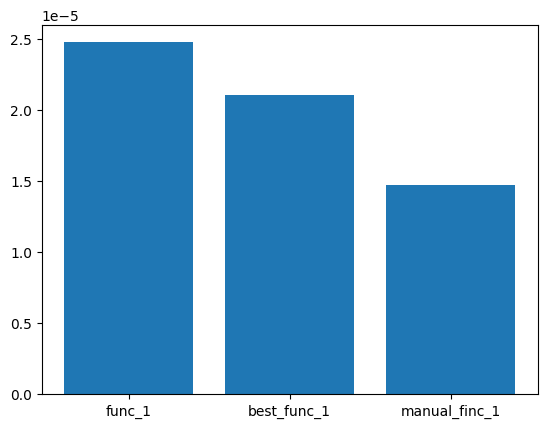

In [31]:
y_axis = [timeit_to_float(time_1), timeit_to_float(best_time_1), timeit_to_float(manual_time_1)]
x_axis = ['func_1', 'best_func_1', 'manual_finc_1']
plt.bar(x_axis, y_axis)
plt.show()

In [32]:
a = np.random.rand(100, 100) + 1

In [33]:
time_1 = %timeit -o func_1(a)
func_1(a)

511 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


5.571326992928609e+17

In [34]:
best_time_1 = %timeit -o best_func_1(a)
best_func_1(a)

20.7 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


5.571326992928609e+17

In [35]:
manual_time_1 = %timeit -o manual_func_1(a)
manual_func_1(a)

120 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


5.571326992928609e+17

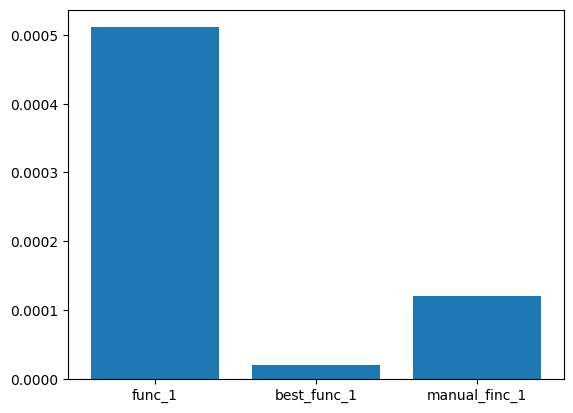

In [36]:
y_axis = [timeit_to_float(time_1), timeit_to_float(best_time_1), timeit_to_float(manual_time_1)]
x_axis = ['func_1', 'best_func_1', 'manual_finc_1']
plt.bar(x_axis, y_axis)
plt.show()

In [37]:
a = np.random.rand(1000, 1000) + 1

In [38]:
time_1 = %timeit -o func_1(a)
func_1(a)

47.9 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


1.2203680682448853e+167

In [39]:
best_time_1 = %timeit -o best_func_1(a)
best_func_1(a)

26.6 µs ± 596 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


1.2203680682448853e+167

In [40]:
manual_time_1 = %timeit -o manual_func_1(a)
manual_func_1(a)

1.21 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


1.2203680682448853e+167

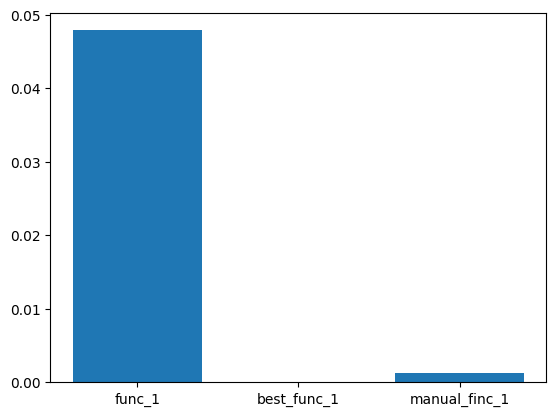

In [41]:
y_axis = [timeit_to_float(time_1), timeit_to_float(best_time_1), timeit_to_float(manual_time_1)]
x_axis = ['func_1', 'best_func_1', 'manual_finc_1']
plt.bar(x_axis, y_axis)
plt.show()

### 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

#### 2.1

In [46]:
def func_2(array, vec1, vec2):
    '''В цикле проходим по всем элементам векторов индексов и находим элементы с совпадающими индексами'''
    new_vec = []
    for i in range(len(vec1)):
        for j in range(len(vec2)):
            if i == j:
                new_vec.append(array[vec1[i]][vec2[j]])
    return np.array(new_vec)

#### 2.2

In [47]:
def best_func_2(array, vec1, vec2):
    '''С помощью конструкции numpy сразу формируем новый вектор'''
    return array[vec1, vec2]

#### 2.3

In [48]:
def manual_func_2(array, vec1, vec2):
    '''В цикле проходим по всем элементам векторов индексов и на каждой итерации добавляем к вектору новый элемент'''
    new_vec = []
    for i in range(len(vec1)):
        new_vec.append(array[vec1[i]][vec2[i]])
    return np.array(new_vec)

### Тесты эффективности

In [54]:
A = np.random.randint(0, 30, (100, 100))
i = np.random.randint(0, len(A), len(A))
j = np.random.randint(0, len(A[0]), len(A[0]))

In [55]:
time_2 = %timeit -o func_2(A, i, j)
func_2(A, i, j)

460 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


array([11, 21, 25, 26, 13, 21, 13,  4, 24, 27,  6, 15,  5, 15, 22, 22, 14,
        5, 10,  6, 24,  7, 11,  9, 22, 12,  6,  5, 21, 12,  3, 15, 20, 22,
       18, 25,  0, 15, 16, 27, 27, 12, 24,  5, 15, 17, 11, 15, 18, 18, 13,
       27, 27, 28, 27, 28,  0,  1, 17, 24, 14, 17,  9, 25, 17, 17, 21,  9,
        1, 20, 11, 15,  2,  0, 27,  2, 15, 14, 25, 18, 23, 11, 23, 19,  5,
        0,  0,  8,  4, 15, 13, 18, 19,  1, 25, 22, 24, 18,  0,  5])

In [56]:
best_time_2 = %timeit -o best_func_2(A, i, j)
best_func_2(A, i, j)

6.64 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


array([11, 21, 25, 26, 13, 21, 13,  4, 24, 27,  6, 15,  5, 15, 22, 22, 14,
        5, 10,  6, 24,  7, 11,  9, 22, 12,  6,  5, 21, 12,  3, 15, 20, 22,
       18, 25,  0, 15, 16, 27, 27, 12, 24,  5, 15, 17, 11, 15, 18, 18, 13,
       27, 27, 28, 27, 28,  0,  1, 17, 24, 14, 17,  9, 25, 17, 17, 21,  9,
        1, 20, 11, 15,  2,  0, 27,  2, 15, 14, 25, 18, 23, 11, 23, 19,  5,
        0,  0,  8,  4, 15, 13, 18, 19,  1, 25, 22, 24, 18,  0,  5])

In [57]:
manual_time_2 = %timeit -o manual_func_2(A, i, j)
manual_func_2(A, i, j)

100 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


array([11, 21, 25, 26, 13, 21, 13,  4, 24, 27,  6, 15,  5, 15, 22, 22, 14,
        5, 10,  6, 24,  7, 11,  9, 22, 12,  6,  5, 21, 12,  3, 15, 20, 22,
       18, 25,  0, 15, 16, 27, 27, 12, 24,  5, 15, 17, 11, 15, 18, 18, 13,
       27, 27, 28, 27, 28,  0,  1, 17, 24, 14, 17,  9, 25, 17, 17, 21,  9,
        1, 20, 11, 15,  2,  0, 27,  2, 15, 14, 25, 18, 23, 11, 23, 19,  5,
        0,  0,  8,  4, 15, 13, 18, 19,  1, 25, 22, 24, 18,  0,  5])

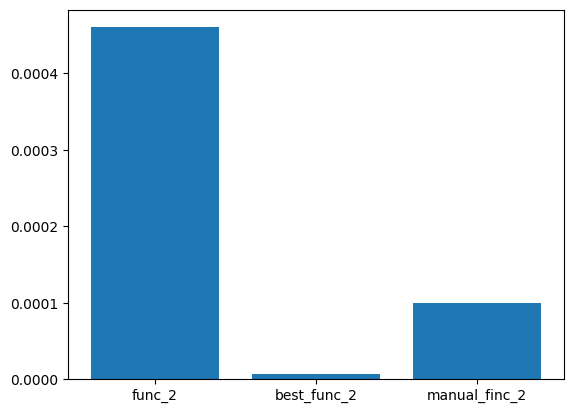

In [58]:
y_axis = [timeit_to_float(time_2), timeit_to_float(best_time_2), timeit_to_float(manual_time_2)]
x_axis = ['func_2', 'best_func_2', 'manual_finc_2']
plt.bar(x_axis, y_axis)
plt.show()

In [59]:
A = np.random.randint(0, 30, (1000, 1000))
i = np.random.randint(0, len(A), len(A))
j = np.random.randint(0, len(A[0]), len(A[0]))

In [60]:
time_2 = %timeit -o func_2(A, i, j)
func_2(A, i, j)

47.8 ms ± 995 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


array([ 7,  6, 11,  4, 25, 15,  2, 18, 29, 27, 15,  0, 27, 22, 18, 24,  5,
       22,  9,  8, 27, 27, 26, 16, 18,  9, 26, 23, 23, 20,  8, 21,  1,  0,
       25,  1, 24, 26, 12,  5,  3, 21, 13,  2, 24, 28, 12, 22,  7, 23, 15,
       16, 16, 29, 24, 18, 29, 14,  6, 18,  5, 10,  5, 13,  8, 25,  3, 21,
        1,  1,  8, 19, 23,  7,  7, 18,  7, 14, 27, 17, 10, 19, 11, 23, 23,
       12, 25, 20, 27,  0,  3, 16, 20, 13, 21,  9, 22,  0,  9,  5, 13, 27,
       20, 19, 17, 12,  3, 17, 18,  0, 21, 20,  8, 15, 19,  2, 19, 16, 16,
       21, 16,  4, 27,  6, 26, 14,  1,  4, 19,  1, 19, 19, 24, 16,  2, 23,
       26,  2, 15, 28, 23, 12, 27,  1, 16,  2, 15, 20,  3,  4, 20,  8,  5,
       25, 18, 27, 14, 22,  7,  0, 22,  4,  0, 13, 19, 28, 28, 19,  4,  6,
       17,  4, 14, 11,  2,  7, 26,  3, 23, 20, 12, 19, 26, 17, 23, 17, 24,
       14, 15, 25, 19, 19, 10, 27, 23,  3,  0, 24,  1,  0,  2,  8,  2, 28,
       27, 26, 10,  3, 14,  9, 20, 27, 21, 10, 20, 11, 28, 13,  5, 20, 11,
        2,  5, 15, 18,  7

In [61]:
best_time_2 = %timeit -o best_func_2(A, i, j)
best_func_2(A, i, j)

19.2 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


array([ 7,  6, 11,  4, 25, 15,  2, 18, 29, 27, 15,  0, 27, 22, 18, 24,  5,
       22,  9,  8, 27, 27, 26, 16, 18,  9, 26, 23, 23, 20,  8, 21,  1,  0,
       25,  1, 24, 26, 12,  5,  3, 21, 13,  2, 24, 28, 12, 22,  7, 23, 15,
       16, 16, 29, 24, 18, 29, 14,  6, 18,  5, 10,  5, 13,  8, 25,  3, 21,
        1,  1,  8, 19, 23,  7,  7, 18,  7, 14, 27, 17, 10, 19, 11, 23, 23,
       12, 25, 20, 27,  0,  3, 16, 20, 13, 21,  9, 22,  0,  9,  5, 13, 27,
       20, 19, 17, 12,  3, 17, 18,  0, 21, 20,  8, 15, 19,  2, 19, 16, 16,
       21, 16,  4, 27,  6, 26, 14,  1,  4, 19,  1, 19, 19, 24, 16,  2, 23,
       26,  2, 15, 28, 23, 12, 27,  1, 16,  2, 15, 20,  3,  4, 20,  8,  5,
       25, 18, 27, 14, 22,  7,  0, 22,  4,  0, 13, 19, 28, 28, 19,  4,  6,
       17,  4, 14, 11,  2,  7, 26,  3, 23, 20, 12, 19, 26, 17, 23, 17, 24,
       14, 15, 25, 19, 19, 10, 27, 23,  3,  0, 24,  1,  0,  2,  8,  2, 28,
       27, 26, 10,  3, 14,  9, 20, 27, 21, 10, 20, 11, 28, 13,  5, 20, 11,
        2,  5, 15, 18,  7

In [62]:
manual_time_2 = %timeit -o manual_func_2(A, i, j)
manual_func_2(A, i, j)

1.01 ms ± 4.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


array([ 7,  6, 11,  4, 25, 15,  2, 18, 29, 27, 15,  0, 27, 22, 18, 24,  5,
       22,  9,  8, 27, 27, 26, 16, 18,  9, 26, 23, 23, 20,  8, 21,  1,  0,
       25,  1, 24, 26, 12,  5,  3, 21, 13,  2, 24, 28, 12, 22,  7, 23, 15,
       16, 16, 29, 24, 18, 29, 14,  6, 18,  5, 10,  5, 13,  8, 25,  3, 21,
        1,  1,  8, 19, 23,  7,  7, 18,  7, 14, 27, 17, 10, 19, 11, 23, 23,
       12, 25, 20, 27,  0,  3, 16, 20, 13, 21,  9, 22,  0,  9,  5, 13, 27,
       20, 19, 17, 12,  3, 17, 18,  0, 21, 20,  8, 15, 19,  2, 19, 16, 16,
       21, 16,  4, 27,  6, 26, 14,  1,  4, 19,  1, 19, 19, 24, 16,  2, 23,
       26,  2, 15, 28, 23, 12, 27,  1, 16,  2, 15, 20,  3,  4, 20,  8,  5,
       25, 18, 27, 14, 22,  7,  0, 22,  4,  0, 13, 19, 28, 28, 19,  4,  6,
       17,  4, 14, 11,  2,  7, 26,  3, 23, 20, 12, 19, 26, 17, 23, 17, 24,
       14, 15, 25, 19, 19, 10, 27, 23,  3,  0, 24,  1,  0,  2,  8,  2, 28,
       27, 26, 10,  3, 14,  9, 20, 27, 21, 10, 20, 11, 28, 13,  5, 20, 11,
        2,  5, 15, 18,  7

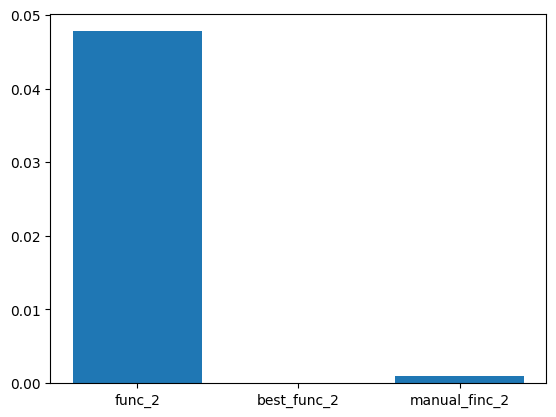

In [63]:
y_axis = [timeit_to_float(time_2), timeit_to_float(best_time_2), timeit_to_float(manual_time_2)]
x_axis = ['func_2', 'best_func_2', 'manual_finc_2']
plt.bar(x_axis, y_axis)
plt.show()

In [64]:
A = np.random.randint(0, 30, (10000, 10000))
i = np.random.randint(0, len(A), len(A))
j = np.random.randint(0, len(A[0]), len(A[0]))

In [65]:
time_2 = %timeit -o func_2(A, i, j)
func_2(A, i, j)

5.04 s ± 87.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([23, 18, 16, ..., 29, 28, 29])

In [66]:
best_time_2 = %timeit -o best_func_2(A, i, j)
best_func_2(A, i, j)

611 µs ± 76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


array([23, 18, 16, ..., 29, 28, 29])

In [67]:
manual_time_2 = %timeit -o manual_func_2(A, i, j)
manual_func_2(A, i, j)

11.7 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array([23, 18, 16, ..., 29, 28, 29])

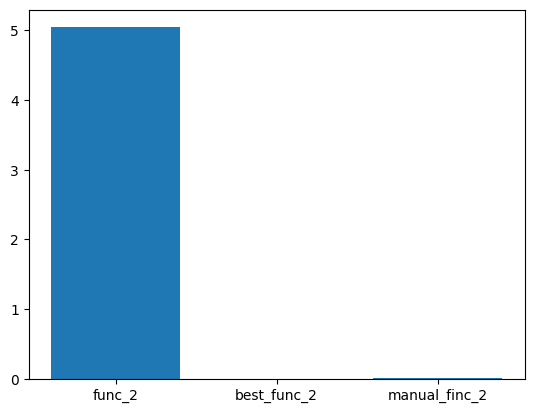

In [68]:
y_axis = [timeit_to_float(time_2), timeit_to_float(best_time_2), timeit_to_float(manual_time_2)]
x_axis = ['func_2', 'best_func_2', 'manual_finc_2']
plt.bar(x_axis, y_axis)
plt.show()

### 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

#### 3.1

In [69]:
def func_3(vec1, vec2):
    '''Если векторы задают одно и то же мультимножество, то их отсортированные версии должны полностью совпадать'''
    a = sorted(vec1)
    b = sorted(vec2)
    if len(a) == len(b):
        for i in range(len(a)):
            if a[i] != b[i]:
                return False
        return True
    
    else:
        return False

#### 3.2

In [70]:
def best_func_3(vec1, vec2):
    '''Проверка на совпадение с помощью функции numpy.array_equal()'''
    return np.array_equal(np.sort(vec1), np.sort(vec2))

#### 3.3

In [71]:
def manual_func_3(vec1, vec2):
    '''Если вычесть два отсортированных массива, задающих одно и то же мультимножество, то получится нулевой массив'''
    a = np.array(sorted(vec1))
    b = np.array(sorted(vec2))
    if len(a) == len(b):
        return np.array_equal((a - b), np.zeros_like(vec1))
    else:
        return False

### Тесты эффективности

In [72]:
x = np.random.randint(0, 4, 100)
y = np.random.randint(0, 4, 100)

In [73]:
time_3 = %timeit -o func_3(x, y)
func_3(x, y)

62.8 µs ± 813 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


False

In [74]:
best_time_3 = %timeit -o best_func_3(x, y)
best_func_3(x, y)

14.5 µs ± 319 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


False

In [75]:
manual_time_3 = %timeit -o manual_func_3(x, y)
manual_func_3(x, y)

102 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


False

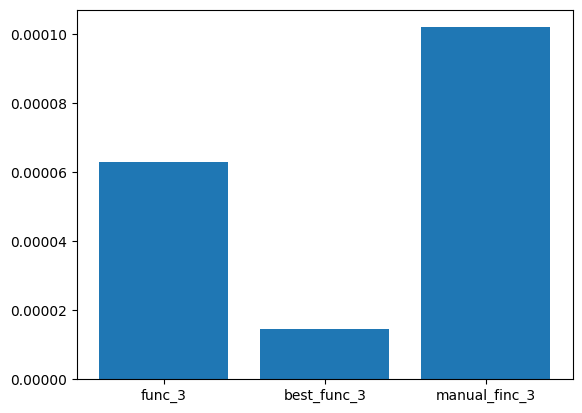

In [76]:
y_axis = [timeit_to_float(time_3), timeit_to_float(best_time_3), timeit_to_float(manual_time_3)]
x_axis = ['func_3', 'best_func_3', 'manual_finc_3']
plt.bar(x_axis, y_axis)
plt.show()

In [77]:
x = np.random.randint(0, 4, 1000)
y = np.random.randint(0, 4, 1000)

In [78]:
time_3 = %timeit -o func_3(x, y)
func_3(x, y)

693 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


False

In [79]:
best_time_3 = %timeit -o best_func_3(x, y)
best_func_3(x, y)

38.1 µs ± 618 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


False

In [80]:
manual_time_3 = %timeit -o manual_func_3(x, y)
manual_func_3(x, y)

882 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


False

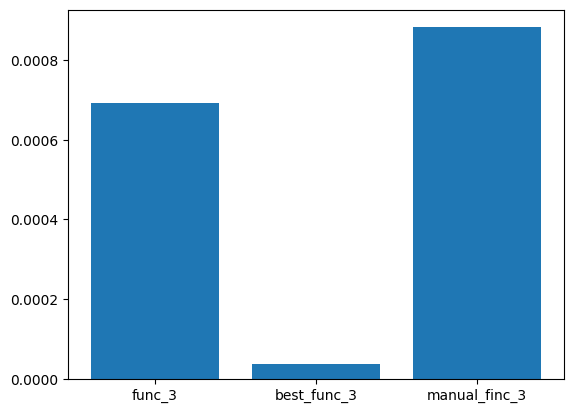

In [81]:
y_axis = [timeit_to_float(time_3), timeit_to_float(best_time_3), timeit_to_float(manual_time_3)]
x_axis = ['func_3', 'best_func_3', 'manual_finc_3']
plt.bar(x_axis, y_axis)
plt.show()

In [82]:
x = np.random.randint(0, 4, 10000)
y = np.random.randint(0, 4, 10000)

In [83]:
time_3 = %timeit -o func_3(x, y)
func_3(x, y)

7.19 ms ± 510 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


False

In [84]:
best_time_3 = %timeit -o best_func_3(x, y)
best_func_3(x, y)

566 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


False

In [85]:
manual_time_3 = %timeit -o manual_func_3(x, y)
manual_func_3(x, y)

9.06 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


False

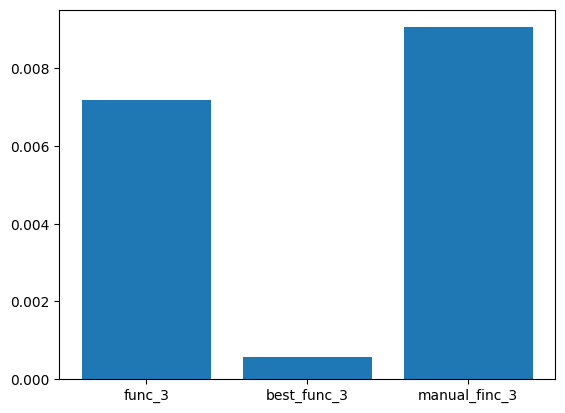

In [86]:
y_axis = [timeit_to_float(time_3), timeit_to_float(best_time_3), timeit_to_float(manual_time_3)]
x_axis = ['func_3', 'best_func_3', 'manual_finc_3']
plt.bar(x_axis, y_axis)
plt.show()

### 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

#### 4.1

In [112]:
from math import inf

def func_4(array):
    '''Нахождение нужного элемента по соответствующему условию'''
    ans = -inf
    for i in range(1, len(array)):
        if array[i - 1] == 0 and array[i] > ans:
            ans = array[i]
    return ans

#### 4.2

In [113]:
def best_func_4(array):
    '''Создаем маску разностей соседних элементов. Если предыдущий элемент равен нулю, то значение в маске совпадает
    со значением в исходном массиве'''
    mask = np.array(np.diff(array))
    new_array = array[1:]
    if 0 in array:
        return max(new_array[np.where(new_array==mask)])
    else:
        return -inf

#### 4.3

In [114]:
def manual_func_4(array):
    '''Можно сделать лаконичную запись с помощью генератора списков'''
    new_array = [array[i] for i in range(1, len(array)) if array[i - 1] == 0]
    if len(new_array) > 0:
        return max(new_array)
    else:
        return -inf

### Тесты эффективности

In [115]:
x = np.random.randint(0, 1000, 1000)

In [116]:
time_4 = %timeit -o func_4(x)
func_4(x)

308 µs ± 4.94 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


144

In [117]:
best_time_4 = %timeit -o best_func_4(x)
best_func_4(x)

29.2 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


144

In [118]:
manual_time_4 = %timeit -o manual_func_4(x)
manual_func_4(x)

289 µs ± 9.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


144

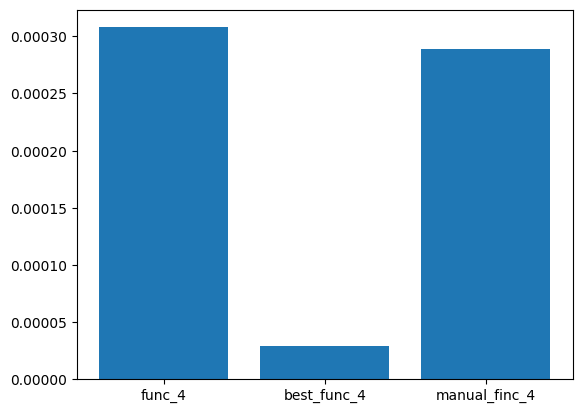

In [119]:
y_axis = [timeit_to_float(time_4), timeit_to_float(best_time_4), timeit_to_float(manual_time_4)]
x_axis = ['func_4', 'best_func_4', 'manual_finc_4']
plt.bar(x_axis, y_axis)
plt.show()

In [120]:
x = np.random.randint(0, 1000, 10000)

In [121]:
time_4 = %timeit -o func_4(x)
func_4(x)

3.35 ms ± 84.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


986

In [122]:
best_time_4 = %timeit -o best_func_4(x)
best_func_4(x)

72.3 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


986

In [123]:
manual_time_4 = %timeit -o manual_func_4(x)
manual_func_4(x)

2.98 ms ± 66.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


986

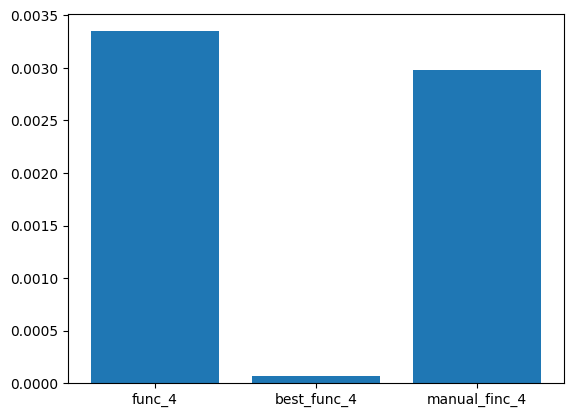

In [124]:
y_axis = [timeit_to_float(time_4), timeit_to_float(best_time_4), timeit_to_float(manual_time_4)]
x_axis = ['func_4', 'best_func_4', 'manual_finc_4']
plt.bar(x_axis, y_axis)
plt.show()

In [125]:
x = np.random.randint(0, 1000, 100000)

In [126]:
time_4 = %timeit -o func_4(x)
func_4(x)

32 ms ± 618 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


989

In [127]:
best_time_4 = %timeit -o best_func_4(x)
best_func_4(x)

488 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


989

In [128]:
manual_time_4 = %timeit -o manual_func_4(x)
manual_func_4(x)

30.6 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


989

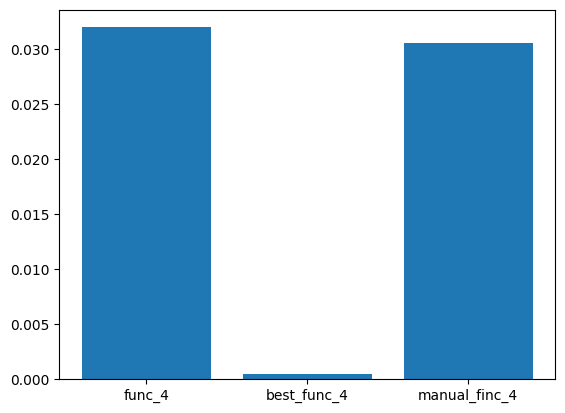

In [129]:
y_axis = [timeit_to_float(time_4), timeit_to_float(best_time_4), timeit_to_float(manual_time_4)]
x_axis = ['func_4', 'best_func_4', 'manual_finc_4']
plt.bar(x_axis, y_axis)
plt.show()

### 5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

#### 5.1

In [130]:
def func_5(array, coeff):
    '''Для каждого элемента в новом массиве вычисляем его как взвешенную сумму элементов соответствующего
    пикселя изображения'''
    new_array = []
    for i in range(len(array)):
        for j in range(len(array[0])):
            new_array.append((np.uint8((coeff[0] * array[i][j][0]) + (coeff[1] * array[i][j][1]) + (coeff[2] * array[i][j][2]))))
    new_array = np.array(new_array)
    new_array.resize(array.shape[:-1])
    return new_array

#### 5.2

In [131]:
def best_func_5(array, coeff):
    '''Взвешенную сумму для всей матрицы можно найти как матричное произведение исходной матрицы на вектор коэффициентов'''
    new_array = np.array(np.dot(np.array(array)[:, :], coeff), dtype = np.uint8)
    return new_array

#### 5.3

In [132]:
def manual_func_5(array, coeff):
    '''С помощью генератора списков сразу вычисляем новый элемент как взвешенную сумму пикселя'''
    new_array = [[np.uint8(sum(elem * coeff)) for elem in row] for row in array]
    return np.array(new_array)

### Тесты эффективности

In [133]:
import imageio
im = imageio.imread('Guido_van_Rossum.png')

C:\Users\user\AppData\Local\Temp\ipykernel_9692\1397276676.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('Guido_van_Rossum.png')


In [134]:
time_5 = %timeit -o imageio.imwrite('gray.png', func_5(im, [0.299, 0.587, 0.114]))
imageio.imwrite('gray.png', func_5(im, [0.299, 0.587, 0.114]))

4.2 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [135]:
best_time_5 = %timeit -o imageio.imwrite('best_gray.png', best_func_5(im, [0.299, 0.587, 0.114]))
imageio.imwrite('best_gray.png', best_func_5(im, [0.299, 0.587, 0.114]))

51.7 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [136]:
manual_time_5 = %timeit -o imageio.imwrite('manual.png', manual_func_5(im, [0.299, 0.587, 0.114]))
imageio.imwrite('manual.png', manual_func_5(im, [0.299, 0.587, 0.114]))

2.74 s ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


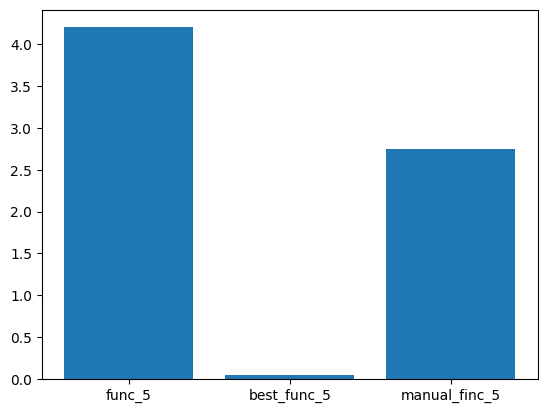

In [137]:
y_axis = [timeit_to_float(time_5), timeit_to_float(best_time_5), timeit_to_float(manual_time_5)]
x_axis = ['func_5', 'best_func_5', 'manual_finc_5']
plt.bar(x_axis, y_axis)
plt.show()

### 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. 
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

#### 6.1

In [138]:
def func_6(array):
    '''В цикле проверяем, равен ли текущий элемент предыдущему. Если да, то инкрементируем счетчик, иначе будет
    новая последовательности чисел; счетчик сбрасывается, в массив чисел добавляется предыдущее чсисло, в массив
    повторений - число его повторений'''
    if len(array) == 0:
        return ([], [])
    numbers = []
    counts = []
    count = 1
    for i in range(1, len(array)):
        if array[i] == array[i - 1]:
            count += 1
        else:
            numbers.append(array[i - 1])
            counts.append(count)
            count = 1
    
    numbers.append(array[-1])
    counts.append(count)
    return (np.array(numbers), np.array(counts))

#### 6.2

In [139]:
def best_func_6(array):
    '''Создаем маску разностей. Если маска разностей не равна нулю, то на этом месте в массиве рядом стоят разные числа'''
    mask = np.diff(array)
    x = array[0]
    y = array[1:][np.where(mask != 0)]
    
    ind = np.where(mask)[0]
    counts = np.concatenate(([ind[0] + 1], np.diff(ind), [array.size - ind[-1] - 1]))
    return np.hstack((x, y)), counts

#### 6.3

In [140]:
def manual_func_6(array):
    '''Заведем новый массив, элементами которого будут пары число - количество его последовательных повторений.
    Для возвращаемого значения разобьем его на два массива: один из чисел, другой из количества их повторений'''
    new_array = [[array[0], 1]]
    for elem in array[1:]:
        if new_array[-1][0] == elem:
            new_array[-1][1] += 1
        else:
            new_array.append([elem, 1])
    return np.array(new_array)[:, 0], np.array(new_array)[:, 1]

### Тесты эффективности

In [183]:
x = np.random.randint(0, 10, 10)

In [184]:
time_6 = %timeit -o func_6(x)
func_6(x)

12 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


(array([6, 3, 0, 3, 6, 8, 2, 1, 9, 3]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [185]:
best_time_6 = %timeit -o best_func_6(x)
best_func_6(x)

42 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([6, 3, 0, 3, 6, 8, 2, 1, 9, 3]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [186]:
manual_time_6 = %timeit -o manual_func_6(x)
manual_func_6(x)

21.5 µs ± 623 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([6, 3, 0, 3, 6, 8, 2, 1, 9, 3]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

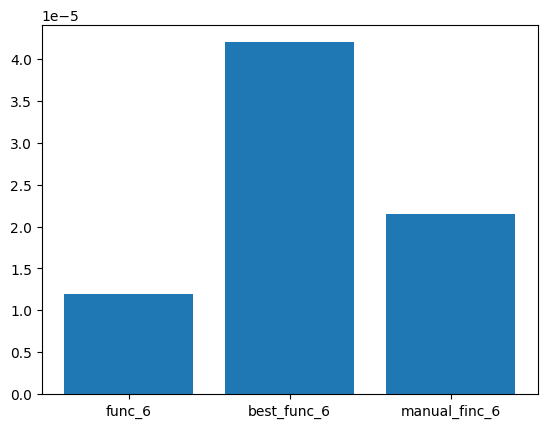

In [187]:
y_axis = [timeit_to_float(time_6), timeit_to_float(best_time_6), timeit_to_float(manual_time_6)]
x_axis = ['func_6', 'best_func_6', 'manual_finc_6']
plt.bar(x_axis, y_axis)
plt.show()

In [188]:
x = np.random.randint(0, 10, 100)

In [189]:
time_6 = %timeit -o func_6(x)
func_6(x)

95.5 µs ± 2.94 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([3, 6, 5, 2, 5, 4, 8, 3, 0, 4, 9, 2, 8, 5, 3, 8, 0, 5, 1, 3, 5, 8,
        5, 1, 5, 6, 8, 5, 1, 3, 9, 2, 3, 1, 4, 7, 0, 3, 6, 2, 8, 1, 4, 7,
        1, 7, 9, 4, 0, 1, 3, 8, 6, 9, 8, 0, 6, 3, 6, 9, 6, 7, 0, 2, 9, 1,
        0, 5, 8, 0, 2, 0, 7, 6, 5, 2, 6, 5, 6, 9, 0, 6, 0, 2, 3, 2, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1]))

In [190]:
best_time_6 = %timeit -o best_func_6(x)
best_func_6(x)

42.4 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([3, 6, 5, 2, 5, 4, 8, 3, 0, 4, 9, 2, 8, 5, 3, 8, 0, 5, 1, 3, 5, 8,
        5, 1, 5, 6, 8, 5, 1, 3, 9, 2, 3, 1, 4, 7, 0, 3, 6, 2, 8, 1, 4, 7,
        1, 7, 9, 4, 0, 1, 3, 8, 6, 9, 8, 0, 6, 3, 6, 9, 6, 7, 0, 2, 9, 1,
        0, 5, 8, 0, 2, 0, 7, 6, 5, 2, 6, 5, 6, 9, 0, 6, 0, 2, 3, 2, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

In [191]:
manual_time_6 = %timeit -o manual_func_6(x)
manual_func_6(x)

148 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([3, 6, 5, 2, 5, 4, 8, 3, 0, 4, 9, 2, 8, 5, 3, 8, 0, 5, 1, 3, 5, 8,
        5, 1, 5, 6, 8, 5, 1, 3, 9, 2, 3, 1, 4, 7, 0, 3, 6, 2, 8, 1, 4, 7,
        1, 7, 9, 4, 0, 1, 3, 8, 6, 9, 8, 0, 6, 3, 6, 9, 6, 7, 0, 2, 9, 1,
        0, 5, 8, 0, 2, 0, 7, 6, 5, 2, 6, 5, 6, 9, 0, 6, 0, 2, 3, 2, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1]))

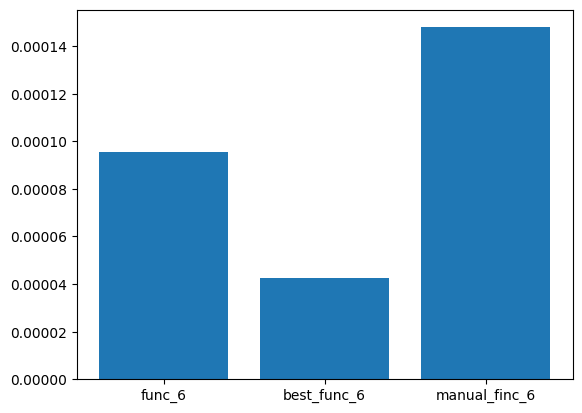

In [192]:
y_axis = [timeit_to_float(time_6), timeit_to_float(best_time_6), timeit_to_float(manual_time_6)]
x_axis = ['func_6', 'best_func_6', 'manual_finc_6']
plt.bar(x_axis, y_axis)
plt.show()

In [193]:
x = np.random.randint(0, 10, 1000)

In [194]:
time_6 = %timeit -o func_6(x)
func_6(x)

966 µs ± 9.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


(array([9, 3, 7, 2, 6, 5, 4, 7, 4, 1, 5, 1, 3, 7, 3, 2, 8, 1, 5, 7, 5, 1,
        4, 3, 6, 2, 8, 9, 5, 8, 6, 1, 4, 1, 4, 7, 2, 7, 0, 3, 4, 6, 2, 6,
        2, 6, 3, 6, 1, 0, 1, 8, 7, 2, 1, 9, 1, 9, 0, 9, 2, 0, 9, 3, 1, 2,
        8, 7, 2, 4, 6, 7, 2, 8, 1, 2, 1, 2, 4, 6, 5, 2, 7, 0, 8, 2, 0, 6,
        8, 2, 1, 9, 7, 3, 5, 8, 7, 1, 7, 6, 4, 8, 5, 2, 3, 8, 2, 5, 6, 7,
        8, 7, 0, 4, 8, 3, 9, 1, 9, 8, 0, 4, 0, 9, 8, 3, 5, 0, 7, 8, 4, 1,
        6, 8, 6, 1, 7, 1, 3, 7, 3, 4, 2, 8, 4, 2, 3, 2, 7, 9, 1, 3, 4, 8,
        9, 7, 6, 9, 8, 0, 7, 0, 4, 9, 7, 3, 6, 1, 3, 9, 0, 7, 9, 1, 2, 7,
        0, 6, 1, 6, 7, 3, 6, 5, 2, 9, 6, 4, 0, 9, 6, 5, 7, 3, 4, 7, 0, 8,
        6, 8, 7, 8, 3, 8, 9, 6, 3, 9, 1, 6, 0, 6, 2, 1, 5, 6, 0, 9, 0, 5,
        7, 0, 9, 3, 4, 2, 5, 3, 0, 1, 6, 5, 8, 9, 1, 8, 4, 7, 4, 2, 1, 0,
        7, 1, 3, 7, 0, 2, 8, 1, 0, 9, 6, 8, 6, 3, 7, 3, 1, 4, 3, 0, 6, 9,
        2, 8, 1, 8, 7, 0, 4, 9, 5, 6, 5, 6, 8, 0, 2, 4, 7, 5, 4, 6, 0, 4,
        1, 8, 0, 4, 8, 6, 2, 4, 7, 3, 

In [195]:
best_time_6 = %timeit -o best_func_6(x)
best_func_6(x)

55.1 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([9, 3, 7, 2, 6, 5, 4, 7, 4, 1, 5, 1, 3, 7, 3, 2, 8, 1, 5, 7, 5, 1,
        4, 3, 6, 2, 8, 9, 5, 8, 6, 1, 4, 1, 4, 7, 2, 7, 0, 3, 4, 6, 2, 6,
        2, 6, 3, 6, 1, 0, 1, 8, 7, 2, 1, 9, 1, 9, 0, 9, 2, 0, 9, 3, 1, 2,
        8, 7, 2, 4, 6, 7, 2, 8, 1, 2, 1, 2, 4, 6, 5, 2, 7, 0, 8, 2, 0, 6,
        8, 2, 1, 9, 7, 3, 5, 8, 7, 1, 7, 6, 4, 8, 5, 2, 3, 8, 2, 5, 6, 7,
        8, 7, 0, 4, 8, 3, 9, 1, 9, 8, 0, 4, 0, 9, 8, 3, 5, 0, 7, 8, 4, 1,
        6, 8, 6, 1, 7, 1, 3, 7, 3, 4, 2, 8, 4, 2, 3, 2, 7, 9, 1, 3, 4, 8,
        9, 7, 6, 9, 8, 0, 7, 0, 4, 9, 7, 3, 6, 1, 3, 9, 0, 7, 9, 1, 2, 7,
        0, 6, 1, 6, 7, 3, 6, 5, 2, 9, 6, 4, 0, 9, 6, 5, 7, 3, 4, 7, 0, 8,
        6, 8, 7, 8, 3, 8, 9, 6, 3, 9, 1, 6, 0, 6, 2, 1, 5, 6, 0, 9, 0, 5,
        7, 0, 9, 3, 4, 2, 5, 3, 0, 1, 6, 5, 8, 9, 1, 8, 4, 7, 4, 2, 1, 0,
        7, 1, 3, 7, 0, 2, 8, 1, 0, 9, 6, 8, 6, 3, 7, 3, 1, 4, 3, 0, 6, 9,
        2, 8, 1, 8, 7, 0, 4, 9, 5, 6, 5, 6, 8, 0, 2, 4, 7, 5, 4, 6, 0, 4,
        1, 8, 0, 4, 8, 6, 2, 4, 7, 3, 

In [196]:
manual_time_6 = %timeit -o manual_func_6(x)
manual_func_6(x)

1.5 ms ± 38.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


(array([9, 3, 7, 2, 6, 5, 4, 7, 4, 1, 5, 1, 3, 7, 3, 2, 8, 1, 5, 7, 5, 1,
        4, 3, 6, 2, 8, 9, 5, 8, 6, 1, 4, 1, 4, 7, 2, 7, 0, 3, 4, 6, 2, 6,
        2, 6, 3, 6, 1, 0, 1, 8, 7, 2, 1, 9, 1, 9, 0, 9, 2, 0, 9, 3, 1, 2,
        8, 7, 2, 4, 6, 7, 2, 8, 1, 2, 1, 2, 4, 6, 5, 2, 7, 0, 8, 2, 0, 6,
        8, 2, 1, 9, 7, 3, 5, 8, 7, 1, 7, 6, 4, 8, 5, 2, 3, 8, 2, 5, 6, 7,
        8, 7, 0, 4, 8, 3, 9, 1, 9, 8, 0, 4, 0, 9, 8, 3, 5, 0, 7, 8, 4, 1,
        6, 8, 6, 1, 7, 1, 3, 7, 3, 4, 2, 8, 4, 2, 3, 2, 7, 9, 1, 3, 4, 8,
        9, 7, 6, 9, 8, 0, 7, 0, 4, 9, 7, 3, 6, 1, 3, 9, 0, 7, 9, 1, 2, 7,
        0, 6, 1, 6, 7, 3, 6, 5, 2, 9, 6, 4, 0, 9, 6, 5, 7, 3, 4, 7, 0, 8,
        6, 8, 7, 8, 3, 8, 9, 6, 3, 9, 1, 6, 0, 6, 2, 1, 5, 6, 0, 9, 0, 5,
        7, 0, 9, 3, 4, 2, 5, 3, 0, 1, 6, 5, 8, 9, 1, 8, 4, 7, 4, 2, 1, 0,
        7, 1, 3, 7, 0, 2, 8, 1, 0, 9, 6, 8, 6, 3, 7, 3, 1, 4, 3, 0, 6, 9,
        2, 8, 1, 8, 7, 0, 4, 9, 5, 6, 5, 6, 8, 0, 2, 4, 7, 5, 4, 6, 0, 4,
        1, 8, 0, 4, 8, 6, 2, 4, 7, 3, 

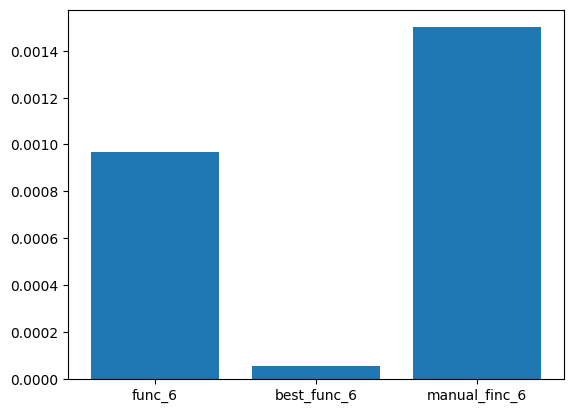

In [197]:
y_axis = [timeit_to_float(time_6), timeit_to_float(best_time_6), timeit_to_float(manual_time_6)]
x_axis = ['func_6', 'best_func_6', 'manual_finc_6']
plt.bar(x_axis, y_axis)
plt.show()

### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

#### 7.1

In [156]:
from math import sqrt


def dist(x, y):
    '''Функция вычисляет евклидово расстояние между двумя векторами произвольной размерности'''
    d = 0
    for coord_x, coord_y in zip(x, y):
        d += (coord_x - coord_y) ** 2
    return sqrt(d)


def func_7(X, Y):
    '''Функция на основе dist() возвращает матрицу расстояний между двумя массивами векторов'''
    ans = []
    for elem_x in X:
        d = []
        for elem_y in Y:
            d.append(dist(elem_x, elem_y))
        ans.append(d)
    return np.array(ans)

#### 7.2

In [157]:
def dist(x, y):
    '''Функция вычисляет евклидово расстояние между двумя векторами произвольной размерности'''
    d = np.array((np.array(x) - np.array(y))**2)
    return sqrt(sum(d))


def best_func_7(X, Y):
    '''Можно представить евклидово расстояние между двумя векторами следующим образом: X^2 - 2XY + Y^2, 
    где X^2 сумма квадратов всех координат первого вектора, Y^2 - аналогично для второго вектора, XY - произведение
    этих матриц'''
    X2 = np.sum(X**2, axis=1)
    Y2 = np.sum(Y**2, axis=1)
    xy = np.dot(X, Y.T)
    X2 = X2.reshape(-1, 1)
    return np.sqrt(X2 - 2*xy + Y2)  

#### 7.3

In [158]:
def manual_func_7(X, Y):
    '''С помощью инструментов numpy для каждой пары объектов вычисляем поэлементную разность их координат,
    возводим значения в полученном списке в квадрат, вычисляем сумму значений и записываем в матрицу расстояний'''
    dist = np.zeros((len(X), len(Y)))
    for i in range(len(X)):
        for j in range(len(Y)):
            dist[i][j] = np.sqrt(np.sum((X[i] - Y[j]) ** 2))
    return dist

### Тесты эффективности

In [159]:
x = np.random.randint(0, 100, (10, 10))

In [160]:
time_7 = %timeit -o func_7(x, x)
func_7(x, x)

962 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


array([[  0.        , 138.84523758, 134.17525852, 146.77193192,
        108.66922287, 111.14405067, 168.4547417 , 146.57762449,
        127.40094191, 156.70673247],
       [138.84523758,   0.        , 147.36010315, 128.69343418,
        115.72812968, 121.9549097 , 133.54774427, 124.64750298,
        164.24676557, 136.72966028],
       [134.17525852, 147.36010315,   0.        , 128.37834708,
         72.09715667, 124.04837766, 167.1466422 ,  97.80593029,
        153.65545874, 132.48396129],
       [146.77193192, 128.69343418, 128.37834708,   0.        ,
        138.61818063, 142.03872711, 127.61269529, 160.73269736,
        146.52986044, 114.8607853 ],
       [108.66922287, 115.72812968,  72.09715667, 138.61818063,
          0.        ,  84.08329204, 149.939988  ,  82.96987405,
        125.73782247, 129.50675658],
       [111.14405067, 121.9549097 , 124.04837766, 142.03872711,
         84.08329204,   0.        , 142.02816622, 107.04204781,
        122.04917042, 140.48487463],
       [16

In [161]:
best_time_7 = %timeit -o best_func_7(x, x)
best_func_7(x, x)

42.4 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


array([[  0.        , 138.84523758, 134.17525852, 146.77193192,
        108.66922287, 111.14405067, 168.4547417 , 146.57762449,
        127.40094191, 156.70673247],
       [138.84523758,   0.        , 147.36010315, 128.69343418,
        115.72812968, 121.9549097 , 133.54774427, 124.64750298,
        164.24676557, 136.72966028],
       [134.17525852, 147.36010315,   0.        , 128.37834708,
         72.09715667, 124.04837766, 167.1466422 ,  97.80593029,
        153.65545874, 132.48396129],
       [146.77193192, 128.69343418, 128.37834708,   0.        ,
        138.61818063, 142.03872711, 127.61269529, 160.73269736,
        146.52986044, 114.8607853 ],
       [108.66922287, 115.72812968,  72.09715667, 138.61818063,
          0.        ,  84.08329204, 149.939988  ,  82.96987405,
        125.73782247, 129.50675658],
       [111.14405067, 121.9549097 , 124.04837766, 142.03872711,
         84.08329204,   0.        , 142.02816622, 107.04204781,
        122.04917042, 140.48487463],
       [16

In [162]:
manual_time_7 = %timeit -o manual_func_7(x, x)
manual_func_7(x, x)

1.42 ms ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


array([[  0.        , 138.84523758, 134.17525852, 146.77193192,
        108.66922287, 111.14405067, 168.4547417 , 146.57762449,
        127.40094191, 156.70673247],
       [138.84523758,   0.        , 147.36010315, 128.69343418,
        115.72812968, 121.9549097 , 133.54774427, 124.64750298,
        164.24676557, 136.72966028],
       [134.17525852, 147.36010315,   0.        , 128.37834708,
         72.09715667, 124.04837766, 167.1466422 ,  97.80593029,
        153.65545874, 132.48396129],
       [146.77193192, 128.69343418, 128.37834708,   0.        ,
        138.61818063, 142.03872711, 127.61269529, 160.73269736,
        146.52986044, 114.8607853 ],
       [108.66922287, 115.72812968,  72.09715667, 138.61818063,
          0.        ,  84.08329204, 149.939988  ,  82.96987405,
        125.73782247, 129.50675658],
       [111.14405067, 121.9549097 , 124.04837766, 142.03872711,
         84.08329204,   0.        , 142.02816622, 107.04204781,
        122.04917042, 140.48487463],
       [16

In [163]:
import scipy

In [164]:
%timeit -o scipy.spatial.distance.cdist(x, x)
scipy.spatial.distance.cdist(x, x)

The slowest run took 8.18 times longer than the fastest. This could mean that an intermediate result is being cached.
29.3 µs ± 30.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([[  0.        , 138.84523758, 134.17525852, 146.77193192,
        108.66922287, 111.14405067, 168.4547417 , 146.57762449,
        127.40094191, 156.70673247],
       [138.84523758,   0.        , 147.36010315, 128.69343418,
        115.72812968, 121.9549097 , 133.54774427, 124.64750298,
        164.24676557, 136.72966028],
       [134.17525852, 147.36010315,   0.        , 128.37834708,
         72.09715667, 124.04837766, 167.1466422 ,  97.80593029,
        153.65545874, 132.48396129],
       [146.77193192, 128.69343418, 128.37834708,   0.        ,
        138.61818063, 142.03872711, 127.61269529, 160.73269736,
        146.52986044, 114.8607853 ],
       [108.66922287, 115.72812968,  72.09715667, 138.61818063,
          0.        ,  84.08329204, 149.939988  ,  82.96987405,
        125.73782247, 129.50675658],
       [111.14405067, 121.9549097 , 124.04837766, 142.03872711,
         84.08329204,   0.        , 142.02816622, 107.04204781,
        122.04917042, 140.48487463],
       [16

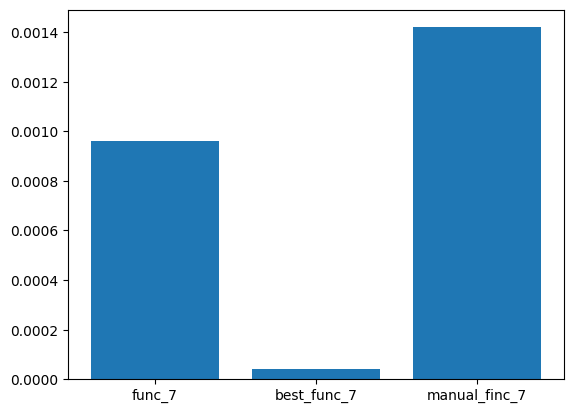

In [165]:
y_axis = [timeit_to_float(time_7), timeit_to_float(best_time_7), timeit_to_float(manual_time_7)]
x_axis = ['func_7', 'best_func_7', 'manual_finc_7']
plt.bar(x_axis, y_axis)
plt.show()

In [166]:
x = np.random.randint(0, 100, (100, 100))

In [167]:
time_7 = %timeit -o func_7(x, x)
func_7(x, x)

230 ms ± 4.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([[  0.        , 431.66537966, 410.4716799 , ..., 407.22352584,
        391.36428043, 400.93765101],
       [431.66537966,   0.        , 422.27242392, ..., 420.73031742,
        390.73648409, 372.79753218],
       [410.4716799 , 422.27242392,   0.        , ..., 395.05695792,
        396.8286784 , 419.99285708],
       ...,
       [407.22352584, 420.73031742, 395.05695792, ...,   0.        ,
        409.29817982, 403.09552218],
       [391.36428043, 390.73648409, 396.8286784 , ..., 409.29817982,
          0.        , 416.15982507],
       [400.93765101, 372.79753218, 419.99285708, ..., 403.09552218,
        416.15982507,   0.        ]])

In [168]:
best_time_7 = %timeit -o best_func_7(x, x)
best_func_7(x, x)

1.2 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


array([[  0.        , 431.66537966, 410.4716799 , ..., 407.22352584,
        391.36428043, 400.93765101],
       [431.66537966,   0.        , 422.27242392, ..., 420.73031742,
        390.73648409, 372.79753218],
       [410.4716799 , 422.27242392,   0.        , ..., 395.05695792,
        396.8286784 , 419.99285708],
       ...,
       [407.22352584, 420.73031742, 395.05695792, ...,   0.        ,
        409.29817982, 403.09552218],
       [391.36428043, 390.73648409, 396.8286784 , ..., 409.29817982,
          0.        , 416.15982507],
       [400.93765101, 372.79753218, 419.99285708, ..., 403.09552218,
        416.15982507,   0.        ]])

In [169]:
manual_time_7 = %timeit -o manual_func_7(x, x)
manual_func_7(x, x)

142 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


array([[  0.        , 431.66537966, 410.4716799 , ..., 407.22352584,
        391.36428043, 400.93765101],
       [431.66537966,   0.        , 422.27242392, ..., 420.73031742,
        390.73648409, 372.79753218],
       [410.4716799 , 422.27242392,   0.        , ..., 395.05695792,
        396.8286784 , 419.99285708],
       ...,
       [407.22352584, 420.73031742, 395.05695792, ...,   0.        ,
        409.29817982, 403.09552218],
       [391.36428043, 390.73648409, 396.8286784 , ..., 409.29817982,
          0.        , 416.15982507],
       [400.93765101, 372.79753218, 419.99285708, ..., 403.09552218,
        416.15982507,   0.        ]])

In [170]:
import scipy

In [171]:
%timeit -o scipy.spatial.distance.cdist(x, x)
scipy.spatial.distance.cdist(x, x)

709 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


array([[  0.        , 431.66537966, 410.4716799 , ..., 407.22352584,
        391.36428043, 400.93765101],
       [431.66537966,   0.        , 422.27242392, ..., 420.73031742,
        390.73648409, 372.79753218],
       [410.4716799 , 422.27242392,   0.        , ..., 395.05695792,
        396.8286784 , 419.99285708],
       ...,
       [407.22352584, 420.73031742, 395.05695792, ...,   0.        ,
        409.29817982, 403.09552218],
       [391.36428043, 390.73648409, 396.8286784 , ..., 409.29817982,
          0.        , 416.15982507],
       [400.93765101, 372.79753218, 419.99285708, ..., 403.09552218,
        416.15982507,   0.        ]])

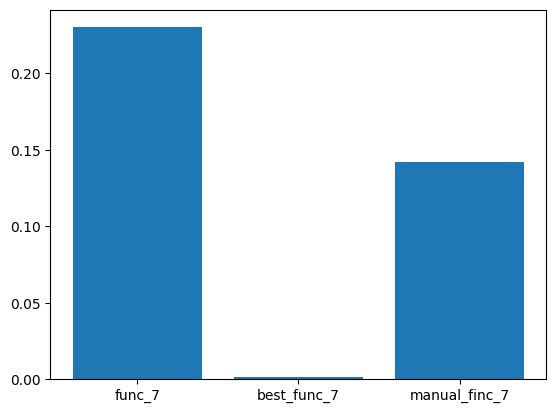

In [172]:
y_axis = [timeit_to_float(time_7), timeit_to_float(best_time_7), timeit_to_float(manual_time_7)]
x_axis = ['func_7', 'best_func_7', 'manual_finc_7']
plt.bar(x_axis, y_axis)
plt.show()

In [202]:
x = np.random.randint(0, 100, (100, 1000))

In [203]:
time_7 = %timeit -o func_7(x, x)
func_7(x, x)

1.52 s ± 24.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([[   0.        , 1272.01926086, 1285.44855984, ..., 1291.26565818,
        1295.16408227, 1295.14207715],
       [1272.01926086,    0.        , 1257.06523299, ..., 1321.90846884,
        1230.74002129, 1305.50143623],
       [1285.44855984, 1257.06523299,    0.        , ..., 1287.77443677,
        1285.18403351, 1326.61938777],
       ...,
       [1291.26565818, 1321.90846884, 1287.77443677, ...,    0.        ,
        1301.36428413, 1302.60508213],
       [1295.16408227, 1230.74002129, 1285.18403351, ..., 1301.36428413,
           0.        , 1275.5841799 ],
       [1295.14207715, 1305.50143623, 1326.61938777, ..., 1302.60508213,
        1275.5841799 ,    0.        ]])

In [204]:
best_time_7 = %timeit -o best_func_7(x, x)
best_func_7(x, x)

9.98 ms ± 45.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array([[   0.        , 1272.01926086, 1285.44855984, ..., 1291.26565818,
        1295.16408227, 1295.14207715],
       [1272.01926086,    0.        , 1257.06523299, ..., 1321.90846884,
        1230.74002129, 1305.50143623],
       [1285.44855984, 1257.06523299,    0.        , ..., 1287.77443677,
        1285.18403351, 1326.61938777],
       ...,
       [1291.26565818, 1321.90846884, 1287.77443677, ...,    0.        ,
        1301.36428413, 1302.60508213],
       [1295.16408227, 1230.74002129, 1285.18403351, ..., 1301.36428413,
           0.        , 1275.5841799 ],
       [1295.14207715, 1305.50143623, 1326.61938777, ..., 1302.60508213,
        1275.5841799 ,    0.        ]])

In [205]:
manual_time_7 = %timeit -o manual_func_7(x, x)
manual_func_7(x, x)

175 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


array([[   0.        , 1272.01926086, 1285.44855984, ..., 1291.26565818,
        1295.16408227, 1295.14207715],
       [1272.01926086,    0.        , 1257.06523299, ..., 1321.90846884,
        1230.74002129, 1305.50143623],
       [1285.44855984, 1257.06523299,    0.        , ..., 1287.77443677,
        1285.18403351, 1326.61938777],
       ...,
       [1291.26565818, 1321.90846884, 1287.77443677, ...,    0.        ,
        1301.36428413, 1302.60508213],
       [1295.16408227, 1230.74002129, 1285.18403351, ..., 1301.36428413,
           0.        , 1275.5841799 ],
       [1295.14207715, 1305.50143623, 1326.61938777, ..., 1302.60508213,
        1275.5841799 ,    0.        ]])

In [206]:
import scipy

In [207]:
%timeit -o scipy.spatial.distance.cdist(x, x)
scipy.spatial.distance.cdist(x, x)

6.92 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array([[   0.        , 1272.01926086, 1285.44855984, ..., 1291.26565818,
        1295.16408227, 1295.14207715],
       [1272.01926086,    0.        , 1257.06523299, ..., 1321.90846884,
        1230.74002129, 1305.50143623],
       [1285.44855984, 1257.06523299,    0.        , ..., 1287.77443677,
        1285.18403351, 1326.61938777],
       ...,
       [1291.26565818, 1321.90846884, 1287.77443677, ...,    0.        ,
        1301.36428413, 1302.60508213],
       [1295.16408227, 1230.74002129, 1285.18403351, ..., 1301.36428413,
           0.        , 1275.5841799 ],
       [1295.14207715, 1305.50143623, 1326.61938777, ..., 1302.60508213,
        1275.5841799 ,    0.        ]])

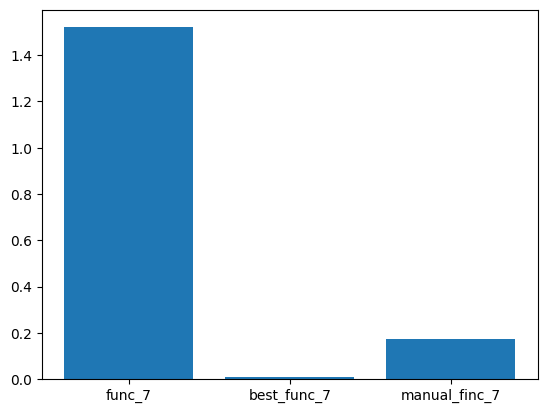

In [208]:
y_axis = [timeit_to_float(time_7), timeit_to_float(best_time_7), timeit_to_float(manual_time_7)]
x_axis = ['func_7', 'best_func_7', 'manual_finc_7']
plt.bar(x_axis, y_axis)
plt.show()

# Выводы по итогу результатов:
Во всех задания код, реализованный с помощью встроенных инструментов библиотеки NumPy, дает наибольшую скорость выполнения; незначительно проигрывает он только в случаях с очень маленькими значениями. По сравнению со страндартными библиотеками языка и реализацией с помощью циклов он дает выигрыш в десятки (а где-то и в сотни) раз. Разница между этими подходами становится тем больше, чем большая размерность у входных данных. Скорее всего, это связано с разной сложностью алгоритмов: в реализациях с циклами она как минимум степенная, а в функциях numpy в большинстве случаев, видимо, ниже. Также имеет значение то, что код для этих функций написан на языке Си, в связи с чем в сложности алгоритмов будут фигурировать меньшие константы.

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

# Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один
вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab, разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

In [ ]:
Soft Deadline - 13 марта в 23:59
Hard Deadline - 20 марта в 23:59